In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.image import imread
from keras import models
from keras import layers
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator 
import os

In [2]:
#обозначаем папки с датасетом
base_dir = 'cats_and_dogs_filtered'

train_dir = base_dir+'/train'
test_dir = base_dir+'/validation'

# Directory with our training cat/dog pictures
train_cats_dir = train_dir+ '/cats'
train_dogs_dir = train_dir+ '/dogs'

# Directory with our validation cat/dog pictures
test_cats_dir = test_dir + '/cats'
test_dogs_dir = test_dir + '/dogs'

In [3]:
#смотрим что содержится в датасете
print('total training cat images :', len(os.listdir(train_cats_dir)))
print('total training dog images :', len(os.listdir(train_cats_dir)))
print('total validation cat images :', len(os.listdir(test_cats_dir)))
print('total validation dog images :', len(os.listdir(test_dogs_dir)))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


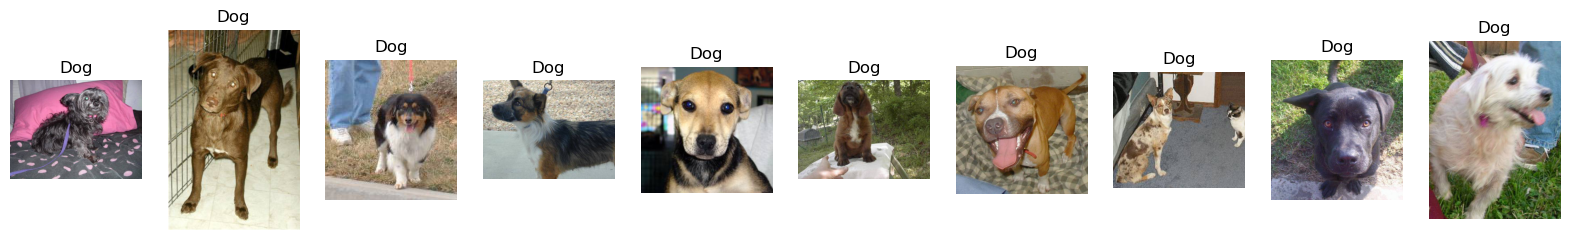

In [4]:
#смотрим собак
plt.figure(figsize=(20,20)) # specifying the overall grid size
plt.subplots_adjust(hspace=0.4)

for i in range(10):
 
    plt.subplot(1,10,i+1)    # the number of images in the grid is 10*10 (100)
    filename = train_dogs_dir + '/dog.' + str(i) + '.jpg'
    image = imread(filename)
    plt.imshow(image)
    plt.title('Dog',fontsize=12)
    plt.axis('off')

plt.show()

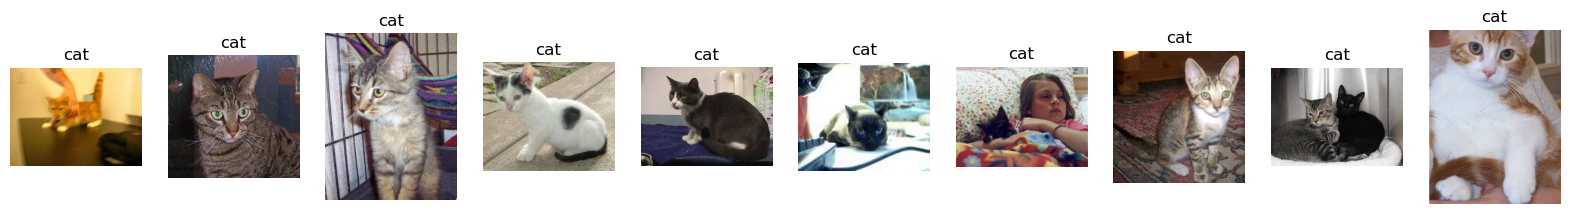

In [5]:
#смотрим котов
plt.figure(figsize=(20,20)) # specifying the overall grid size
plt.subplots_adjust(hspace=0.4)

for i in range(10):
 
    plt.subplot(1,10,i+1)    # the number of images in the grid is 10*10 (100)
    filename = train_cats_dir + '/cat.' + str(i) + '.jpg'
    image = imread(filename)
    plt.imshow(image)
    plt.title('cat',fontsize=12)
    plt.axis('off')

plt.show()

In [6]:
#создаем трейн и тест выборки
train_val_split = 0.2 #разбиение на обучающую-валидационную

train_datagen = ImageDataGenerator(rescale = 1./255, validation_split=train_val_split, rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
train_generator = train_datagen.flow_from_directory(train_dir, target_size = (150, 150), batch_size = 20, class_mode = 'binary', subset='training')
val_generator = train_datagen.flow_from_directory(train_dir, target_size = (150, 150), batch_size = 20, class_mode = 'binary', subset='validation')

Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [7]:
#выгружаем VGG16
from keras.applications import VGG16
cnn_base = VGG16(weights = 'imagenet', include_top = False, input_shape = (150, 150, 3))

In [8]:
cnn_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [9]:
#добавляем полносвязные слои
model = models.Sequential()
model.add(cnn_base)
model.add(layers.Flatten())
model.add(layers.Dense(192, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [10]:
#собираем
cnn_base.trainable = False
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 192)               1573056   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 193       
Total params: 16,287,937
Trainable params: 1,573,249
Non-trainable params: 14,714,688
_________________________________________________________________


In [11]:
#обучаем
epoch_num = 50 

history = model.fit(train_generator, steps_per_epoch = 80, epochs = epoch_num, validation_data = val_generator, validation_steps = 10)

Epoch 1/50
80/80 [==============================] - 41s 517ms/step - loss: 0.8239 - accuracy: 0.6881 - val_loss: 0.4375 - val_accuracy: 0.7600
Epoch 2/50
80/80 [==============================] - 41s 509ms/step - loss: 0.4783 - accuracy: 0.7850 - val_loss: 0.6231 - val_accuracy: 0.6850
Epoch 3/50
80/80 [==============================] - 41s 510ms/step - loss: 0.4222 - accuracy: 0.7981 - val_loss: 0.3665 - val_accuracy: 0.8450
Epoch 4/50
80/80 [==============================] - 41s 510ms/step - loss: 0.3823 - accuracy: 0.8250 - val_loss: 0.6249 - val_accuracy: 0.7700
Epoch 5/50
80/80 [==============================] - 41s 509ms/step - loss: 0.4193 - accuracy: 0.8112 - val_loss: 0.3797 - val_accuracy: 0.8100
Epoch 6/50
80/80 [==============================] - 42s 520ms/step - loss: 0.3826 - accuracy: 0.8206 - val_loss: 0.3813 - val_accuracy: 0.8400
Epoch 7/50
80/80 [==============================] - 41s 510ms/step - loss: 0.3351 - accuracy: 0.8587 - val_loss: 0.4142 - val_accuracy: 0.7650

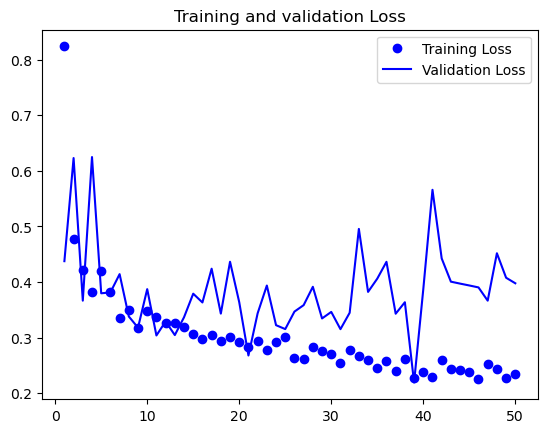

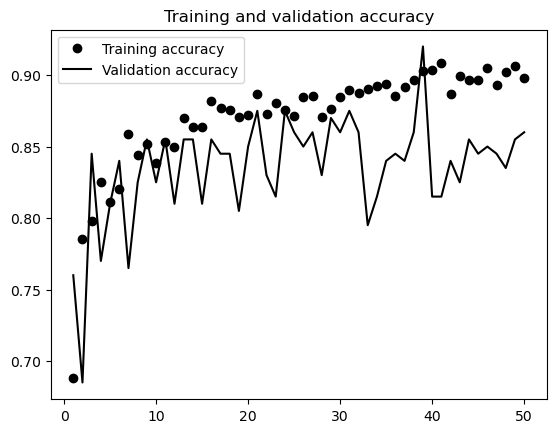

In [12]:
#смотрим графики по обучению 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

#график лосс
epochs = range(1, (epoch_num + 1))
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.show()

#график аккураси
plt.plot(epochs, acc, 'ko', label='Training accuracy')
plt.plot(epochs, val_acc, 'k', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

In [13]:
#аккураси на тестовой выборке
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=10, class_mode='binary')
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
50/50 [==============================] - 11s 227ms/step - loss: 0.2681 - accuracy: 0.9080
test acc: 0.9079999923706055


In [14]:
#сохраним модель, мб дообучим
#model.save('NikitaRvgg50Ep.h5')

In [ ]:
#здесь можно загрузить модель
#from keras.models import load_model
#model = load_model('NikitaRvgg50Ep.h5')

In [44]:
#здесь можно потестить на изображениях
num = '2323' #сюда номер пары изображений
filename1 = test_cats_dir + '/cat.' + num + '.jpg'
filename2 = test_dogs_dir + '/dog.' + num + '.jpg'

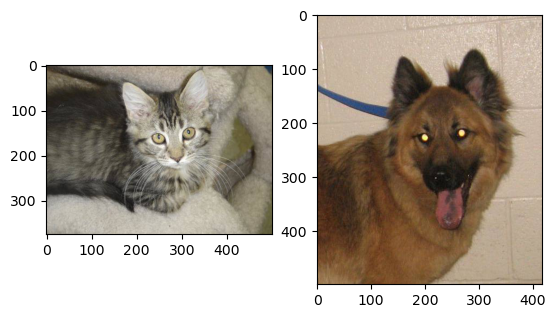

In [45]:
plt.subplot(1,2,1)
plt.imshow(imread(filename1))
plt.subplot(1,2,2)
plt.imshow(imread(filename2))

In [46]:
#здесь делается предсказание
from keras.preprocessing import image 
test_cat = image.load_img(filename1,target_size=(150,150)) 
test_dog = image.load_img(filename2,target_size=(150,150)) 

pred_cat = model.predict(np.expand_dims(test_cat, axis=0))
pred_dog = model.predict(np.expand_dims(test_dog, axis=0))

if pred_cat == 0:
    print('на фото слева кот,')
else:
    print('на фото слева нейросеть распознала собаку, а должен быть кот;')

if pred_dog == 1:
    print('на фото справа собака.')
else:
    print('на фото справа нейросеть распознала кота, а должна быть собака.')


на фото слева кот,
на фото справа собака.
